### Pandas Cookbook - Chapter 2
---------------------------------------
Fonte: https://github.com/jvns/pandas-cookbook

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.style.use('default')

In [5]:
plt.rcParams['figure.figsize'] = (15, 5)

In [6]:
path = '/home/laercio.serra/Temp/'
filename = '311-service-requests.csv'

In [7]:
complaints = pd.read_csv(path+filename)

In [8]:
complaints.columns

Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Action Updated Date', u'Community Board',
       u'Borough', u'X Coordinate (State Plane)',
       u'Y Coordinate (State Plane)', u'Park Facility Name', u'Park Borough',
       u'School Name', u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',
       u'Bridge Highway Segment',

In [9]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11156 entries, 0 to 11155
Data columns (total 52 columns):
Unique Key                        11156 non-null int64
Created Date                      11156 non-null object
Closed Date                       3386 non-null object
Agency                            11156 non-null object
Agency Name                       11156 non-null object
Complaint Type                    11156 non-null object
Descriptor                        11104 non-null object
Location Type                     7564 non-null object
Incident Zip                      9876 non-null float64
Incident Address                  8721 non-null object
Street Name                       8720 non-null object
Cross Street 1                    8629 non-null object
Cross Street 2                    8533 non-null object
Intersection Street 1             1704 non-null object
Intersection Street 2             1704 non-null object
Address Type                      10289 non-null object
City

In [10]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432.0,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378.0,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032.0,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023.0,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027.0,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [11]:
complaints['Complaint Type'].head()

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

In [12]:
complaints[['Complaint Type','Borough']].head(10)

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


In [13]:
complaints['Complaint Type'].value_counts()

HEATING                                 1854
Street Light Condition                   885
GENERAL CONSTRUCTION                     768
DOF Literature Request                   596
PLUMBING                                 563
PAINT - PLASTER                          517
NONCONST                                 364
Blocked Driveway                         350
Traffic Signal Condition                 305
Illegal Parking                          290
Noise                                    288
ELECTRIC                                 284
Water System                             267
Street Condition                         250
Building/Use                             241
Broken Muni Meter                        199
Sanitation Condition                     170
Dirty Conditions                         168
General Construction/Plumbing            163
Sewer                                    152
Noise - Commercial                       148
Consumer Complaint                       130
Rodent    

In [14]:
top10_complaints = complaints['Complaint Type'].value_counts()
top10_complaints[:10]

HEATING                     1854
Street Light Condition       885
GENERAL CONSTRUCTION         768
DOF Literature Request       596
PLUMBING                     563
PAINT - PLASTER              517
NONCONST                     364
Blocked Driveway             350
Traffic Signal Condition     305
Illegal Parking              290
Name: Complaint Type, dtype: int64

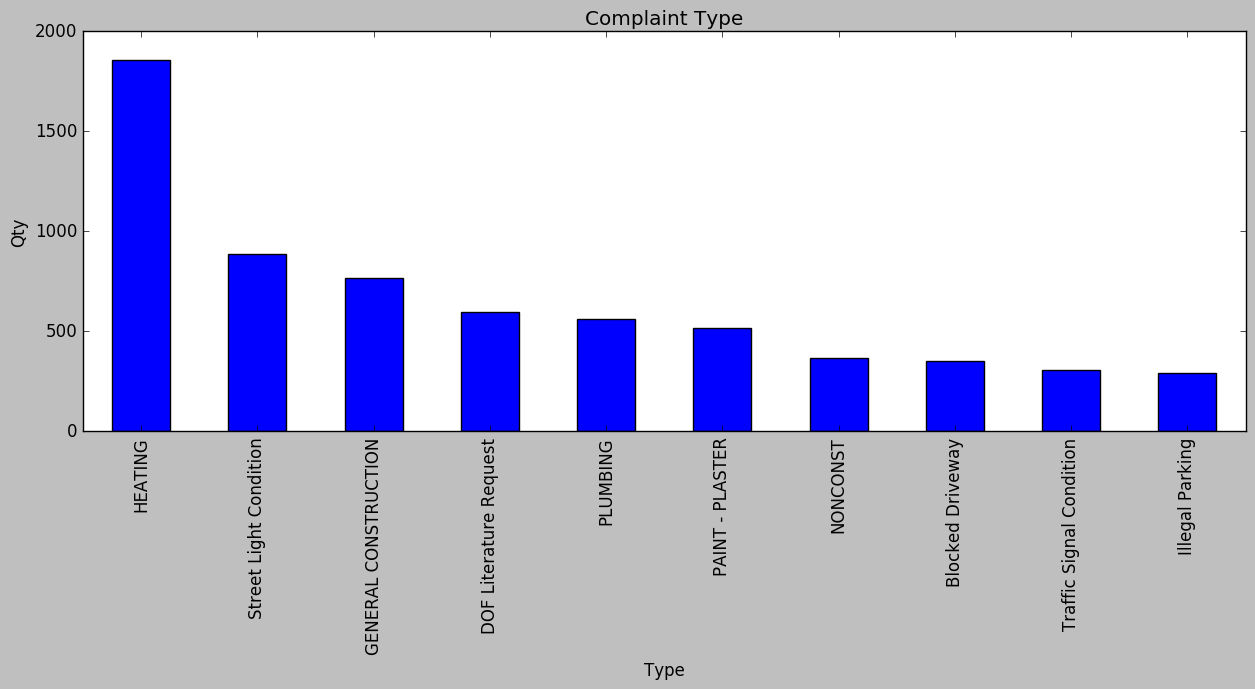

In [17]:
top10_complaints[:10].plot(kind='bar')
plt.title(u'Complaint Type')
plt.ylabel(u'Qty')
plt.xlabel(u'Type')
plt.show()